# Part II - (Data Analysis and Visualization of the Prosper Loan Dataset)
## by (Oluwabukola G. Adegboro)

## Investigation Overview

> The overall goal is to address if a borrower's income can affect the status of a loan’s outcome. Specifically, a key insight is that the IncomeVerifiable feature plays a major role in determining if a loan will be granted or not. This means that providing sufficient means of documentation to back up the borrower's income can be a major factor in determining if the borrow is high risk or not, hence indicating they are being granted loan or not.


## Dataset Overview

> The original dataset contains 113,937 entries with 81 features. The majority of the variables under the respective features were numeric in nature with an exception of some variables with string input e.g (ListingKey, ListingCreationDate, CreditGrade, LoanStatus, ClosedDate, ProsperRating (Alpha), BorrowerState, Occupation, EmploymentStatus, GroupKey, DateCreditPulled, FirstRecordedCreditLine, IncomeRange, LoanKey,  LoanOriginationDate, LoanOriginationQuarter, MemberKey) or boolean values such as the features ('IsBorrowerHomeowner','CurrentlyInGroup', and 'IncomeVerifiable'). Some features also contain missing values.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import missingno as msno

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# Getting the data visualization directory 
data_visualization_directory=('C:\\Users\\User\\OneDrive\\Documents\\Udacity\\Nanodegree\\Introduction_to_Data_Analysis\\data_visualization\\')

# Read the prosperLoanData csv file
csv_file_path = os.path.join(data_visualization_directory, 'dataset\\prosperLoanData.csv')
data_df = pd.read_csv(csv_file_path)
# viewing the first 10 rows of the prosperLoanData csv file
data_df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [3]:
# Checking for the percentage of missing values per column of the prosperLoanData csv file.
data_df.isnull().sum().sort_values(ascending=False)/len(data_df)

GroupKey                         0.882909
LoanFirstDefaultedCycleNumber    0.851216
ScorexChangeAtTimeOfListing      0.833873
ProsperPrincipalOutstanding      0.806165
ProsperPrincipalBorrowed         0.806165
                                   ...   
IncomeRange                      0.000000
IncomeVerifiable                 0.000000
StatedMonthlyIncome              0.000000
LoanKey                          0.000000
Investors                        0.000000
Length: 81, dtype: float64

In [4]:
# Getting columns with null values greater than (>) 70% of the total original data (i.e 79,756) in the prosperLoanData csv file.
missing_col_list = list(set(data_df.columns[data_df.isnull().sum()>=79756]))
missing_col_list
# Reference: https://stackoverflow.com/questions/37366717/pandas-print-column-name-with-missing-values

['ScorexChangeAtTimeOfListing',
 'CreditGrade',
 'ProsperPaymentsLessThanOneMonthLate',
 'OnTimeProsperPayments',
 'TotalProsperLoans',
 'ProsperPrincipalBorrowed',
 'ProsperPaymentsOneMonthPlusLate',
 'ProsperPrincipalOutstanding',
 'LoanFirstDefaultedCycleNumber',
 'GroupKey',
 'TotalProsperPaymentsBilled']

In [5]:
# Data Cleaning

# Make copies of original pieces of data
data_df_copy=data_df.copy()
data_df_copy.head(10)

# Dropping columns with null values greater than (>) 70% of the total original data (i.e 79,756) in the csv file.
data_df_copy = data_df_copy.drop(missing_col_list, axis=1)

In [6]:
# Drop empty rows with null values/records.
data_df_copy = data_df_copy.dropna(axis=0, how='any')

In [7]:
# Converting the StatedMonthlyIncome variables to integers
data_df_copy['StatedMonthlyIncome'] = data_df_copy['StatedMonthlyIncome'].map(int)

In [8]:
# Since the variables under the IncomeRange column is not consistent, the 'Not employed' variable would be converted to $0.

# Replacing the 'Non employed' variable with '$0'
data_df_copy.IncomeRange.replace(['Not employed'], '$0', inplace=True)

# Converting the IncomeRange variables into ordered categorical variables.
ordered_ordinal_var_dict =['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999', '$1-24,999', '$0']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                            categories = ordered_ordinal_var_dict)
data_df_copy['IncomeRange'] = data_df_copy['IncomeRange'].astype(ordered_var)

In [9]:
# Plot functions used for visualization.

def plot_size_and_weight(plot_graph, bold_font=False):
    # To update/change the fontsize of the plot.
    for plot_label in (plot_graph.get_xticklabels() + plot_graph.get_yticklabels()):
        plot_label.set_fontsize(20)
        if bold_font==True:
            plot_label.set_fontweight('bold')
        
def axis_and_titles(plot_title, xaxis_label, yaxis_label, set_grid=False):
    # Setting the title of the figure.
    plt.title(str(plot_title),fontsize = 18)
    # Setting the x-label and y-label of the plot.
    plt.xlabel(str(xaxis_label),fontsize = 15)
    plt.ylabel(str(yaxis_label),fontsize = 15)
    if set_grid==True:
        sb.set_style("whitegrid")

## What is the Risk Score of the Borrowers assigned by Prosper?

ProsperScore is a custom risk score built using historical Prosper data, and ranges from 1 (highest risk)-10 (lowest/best risk).

In [10]:
# Converting the ProsperScore variables to integers
data_df_copy['ProsperScore'] = data_df_copy['ProsperScore'].map(int)

# Since the proper score rating rightly ranges from 1-10,  ratings with 11 will be excluded
data_df_copy = data_df_copy[data_df_copy.ProsperScore!=11]

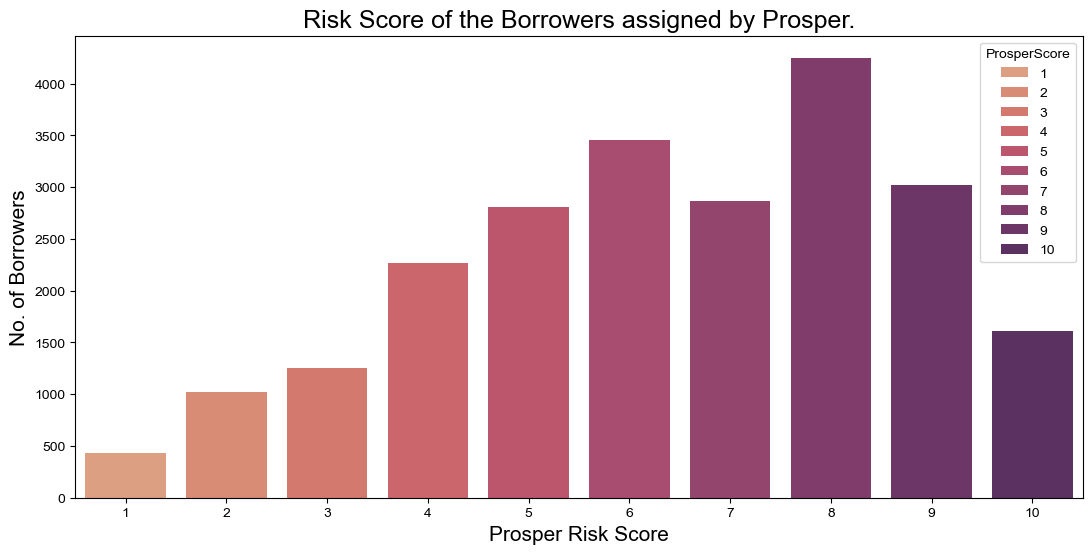

In [11]:
# Plot of the ProsperScore of the Borrowers.
fig, ax = plt.subplots(figsize=(13,6))
x_axis= data_df_copy.ProsperScore
sb.countplot(x=x_axis, hue=x_axis, data=x_axis, palette='flare', dodge=False)
axis_and_titles(plot_title='Risk Score of the Borrowers assigned by Prosper.', 
                xaxis_label= 'Prosper Risk Score',
                yaxis_label= 'No. of Borrowers',
                set_grid=True)

The barplot above indicates that a higher number of borrowers fall within the risk factor of 8. This can indicate the borrower is more likely to be granted a loan with a lower risk score. 

## How many borrowers verified their income?

IncomeVerifiable indicates that the borrower has provided the required documentation to support their income as proof of funds.

In [12]:
# Converting the IncomeVerifiable column to ordered categorical variables.
index_value = data_df_copy.IncomeVerifiable.value_counts().index
ordered_ordinal_var_dict = index_value
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                            categories = ordered_ordinal_var_dict)
data_df_copy['IncomeVerifiable'] = data_df_copy['IncomeVerifiable'].astype(ordered_var)

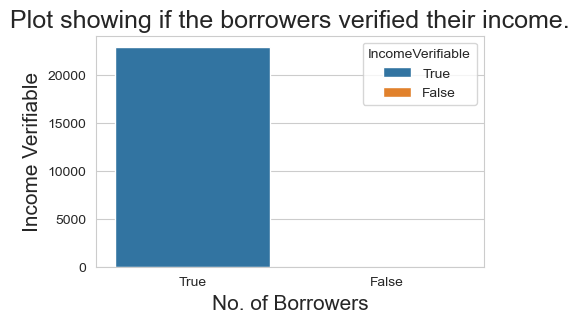

In [13]:
# Plot of the Income Verifiable of the Borrowers.
fig, ax = plt.subplots(figsize=(5, 3))
x_axis= data_df_copy.IncomeVerifiable
sb.countplot(x=x_axis, hue=x_axis, data=x_axis, dodge=False)
axis_and_titles(plot_title='Plot showing if the borrowers verified their income.', 
                xaxis_label= 'No. of Borrowers',
                yaxis_label= 'Income Verifiable',
                set_grid=True)

Based on the above visualization, 99% of the borrowers are able to provide proof of documentation backing up their income. This indicates that this is a crucial factor in granting a borrower a loan or not.

## What is the Pairwise correlation on Numerical Features
First, the goal is to identify the pairwise correlations between the following numerical features; 'ProsperScore', 'DebtToIncomeRatio', and 'StatedMonthlyIncome' in the data.

In [14]:
# Setting the numeric and categorical variables.
numeric_vars = ['DebtToIncomeRatio', 'StatedMonthlyIncome', 'ProsperScore']
categorical_vars= ['IncomeRange', 'IncomeVerifiable']

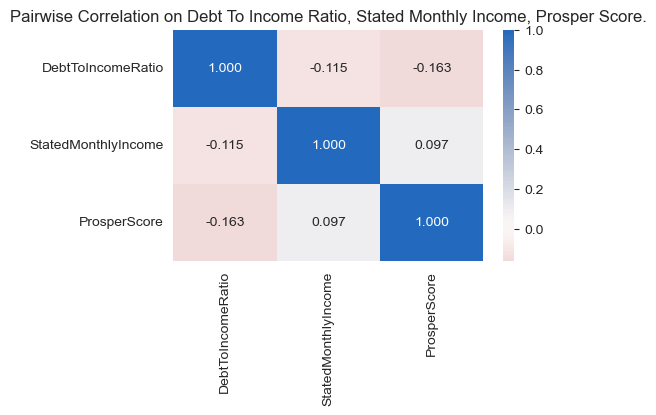

In [15]:
# Correlation plot
plt.figure(figsize = [5, 3])
sb.heatmap(data_df_copy[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
# Include the title of the plot
plt.title("Pairwise Correlation on Debt To Income Ratio, Stated Monthly Income, Prosper Score.", fontsize=12)
plt.show()

The correlation plot above indicates that there is a negative correlation (-0.115) between the DebtToIncomeRatio and the StatedMonthlyIncome, as well as between the DebtToIncomeRatio and ProsperScore (-0.163). This indicates that as one variable increases, this results in the decrease of the other variable. On the other hand, there is almost no correlation (0.097) between the StatedMonthlyIncome and ProsperScore features.

Reference: https://www.investopedia.com/terms/n/negative-correlation.asp

### What is the distribution of the Numerical Features?
Here, the goal is to explore further and display the distribution between the following numerical features; 'ProsperScore', 'DebtToIncomeRatio', and 'StatedMonthlyIncome' in the data

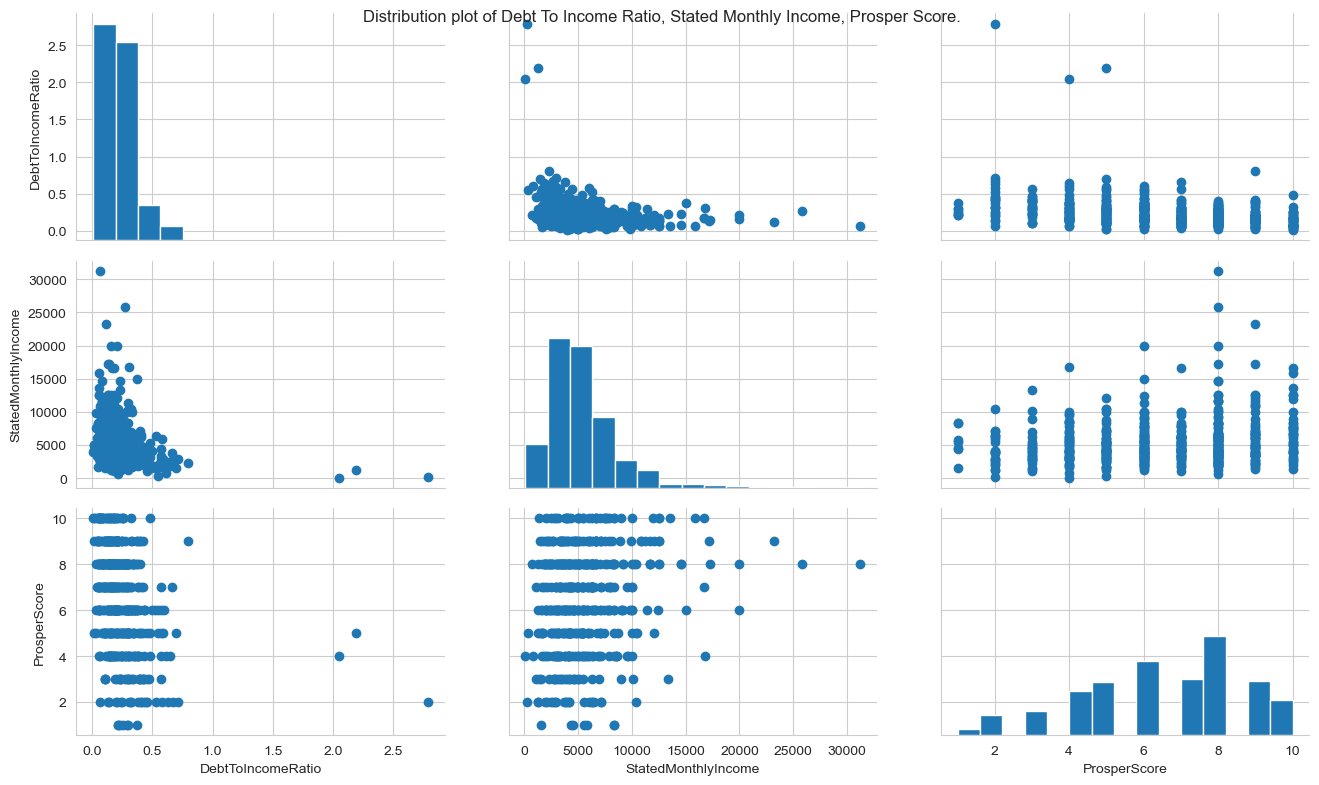

In [16]:
# Plotting a matrix to sample 500 loans
data_df_copy_samp =data_df_copy.sample(500)
g = sb.PairGrid(data = data_df_copy_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 15);
g.map_offdiag(plt.scatter)
## Set Plot Dimensions - FIGURE LEVEL
g.fig.set_size_inches(14, 8);
g.fig.suptitle("Distribution plot of Debt To Income Ratio, Stated Monthly Income, Prosper Score.");

The matrix plot further confirms the correlation plot. It also indicates that the distribution of the DebtToIncomeRatio and StatedMonthlyIncome displayed a left-skewed and a unimodal distribution, while the ProsperScore displayed a right-skewed and a unimodel distribution.

## What is the plot of the IncomeRange and IncomeVerifiable in relation to the Median ProsperScore

The multivariate exploration below will display the relationship between the 'IncomeRange', 'IncomeVerifiable and 'ProsperScore'

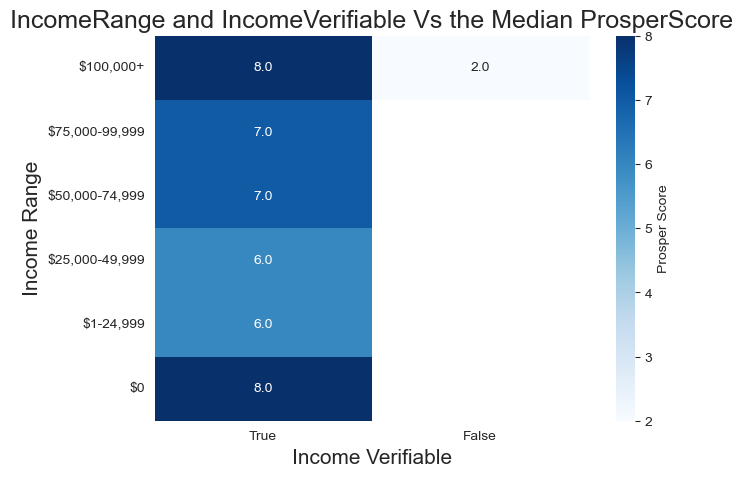

In [22]:
# Plotting a heat map
plt.figure(figsize = [7,5])
data_group = data_df_copy.groupby(['IncomeVerifiable', 'IncomeRange']).median()['ProsperScore']
data_group = data_group.reset_index(name = 'ProsperScore')
data_group = data_group.pivot(index = 'IncomeRange', columns = 'IncomeVerifiable', values = 'ProsperScore')
sb.heatmap(data_group, annot = True, fmt = '.1f', cmap = "Blues", cbar_kws = {'label' : 'Prosper Score'})

axis_and_titles(plot_title='IncomeRange and IncomeVerifiable Vs the Median ProsperScore', 
                xaxis_label='Income Verifiable',
                yaxis_label='Income Range',
                set_grid=True)

This plot provides more insight regarding the median prosper risk score. In this case, it shows that the median risk score for income range of 1-49,999 USD, 50,000-99,999 USD and 100,000+ USD with verifiable income is 6, 7 and 8 respectively. For non-verifiable income, even though the income range was high (100,000+ USD), the risk score is still very high (2.0). This once again proves that showing a proof of documentation to back up the income is a key factor in determining if the borrower will be granted a loan or not.

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [24]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 902461 bytes to Part_II_slide_deck_template.slides.html


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
